In [33]:
import numpy as np
import pandas as pd
import time

import ktrain
from ktrain import text
from keras.models import load_model

import sklearn

In [89]:
#path for export data
outpath_predictor = '../predictor'
outpath_pics = '../pics'

predictorname  = "dectet_hatespeech_1000_ep_5_"+(time.strftime("%Y%m%d"))

heatmapname = 'heatmap_1000_ep_5_'+(time.strftime("%Y%m%d")) +'.jpg'




In [29]:
df_tweets = pd.read_csv('../data/df_tweets_final_20200101.csv', sep = '|')

print('done with import train-file')

done with import train-file


In [ ]:
df_tweets.sample(10)

In [9]:
df_tweets_1000 = df_tweets.sample(1000)

In [34]:
#save dataframe to csv for traceability
filename = "df_tweets_1000_"+(time.strftime("%Y%m%d")+".csv")

df_tweets_1000.to_csv(outpath_data + "/" + filename, sep = '|')

print(outpath_data + "/" + filename)

../data/df_tweets_1000_20200101.csv


In [13]:
df_tweets_1000['label_all'].value_counts()

0    635
1    365
Name: label_all, dtype: int64

In [41]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df_tweets_1000,
                                                                  'tweet_tidy',
                                                                   maxlen=500, 
                                                                   preprocess_mode='bert',
                                                                   label_columns =['label_all'])

preprocessing train...
language: en


preprocessing test...
language: en


In [42]:
model = text.text_classifier('bert', 
                             (x_train, y_train), 
                             preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [43]:
learner = ktrain.get_learner(model,train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

In [44]:
%%time
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
900/900 [==============================] - 2013s 2s/step - loss: 0.6818 - acc: 0.5867
Epoch 2/1024
900/900 [==============================] - 2064s 2s/step - loss: 0.6263 - acc: 0.6611
Epoch 3/1024
900/900 [==============================] - 1974s 2s/step - loss: 0.4771 - acc: 0.7911
Epoch 4/1024
900/900 [==============================] - 1960s 2s/step - loss: 0.2813 - acc: 0.8878
Epoch 5/1024
900/900 [==============================] - 2017s 2s/step - loss: 0.2313 - acc: 0.9111
Epoch 6/1024
900/900 [==============================] - 1966s 2s/step - loss: 0.5694 - acc: 0.7056
Epoch 7/1024
666/900 [=====================>........] - ETA: 8:55 - loss: 0.8064 - acc: 0.5841

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.
CPU times: user 1d 6h 31min 33s, sys: 4h 49min 18s, total: 1d 11h 20min

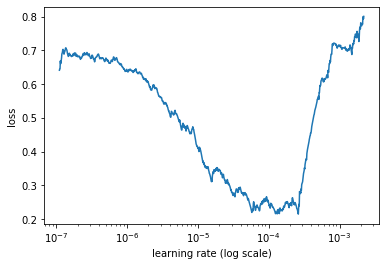

In [45]:
learner.lr_plot()
#learn.recorder.plot(suggestion=True)

In [54]:
learner.fit_onecycle(0.00002, 5)



begin training using onecycle policy with max lr of 2e-05...
Train on 900 samples, validate on 100 samples
Epoch 1/5
900/900 [==============================] - 1951s 2s/step - loss: 0.5509 - acc: 0.7278 - val_loss: 0.3848 - val_acc: 0.8300
Epoch 2/5
900/900 [==============================] - 1932s 2s/step - loss: 0.3273 - acc: 0.8778 - val_loss: 0.3174 - val_acc: 0.8700
Epoch 3/5
900/900 [==============================] - 1929s 2s/step - loss: 0.1821 - acc: 0.9356 - val_loss: 0.2584 - val_acc: 0.8600
Epoch 4/5
900/900 [==============================] - 1923s 2s/step - loss: 0.0661 - acc: 0.9811 - val_loss: 0.3272 - val_acc: 0.8500
Epoch 5/5
900/900 [==============================] - 1924s 2s/step - loss: 0.0203 - acc: 0.9956 - val_loss: 0.4013 - val_acc: 0.8500


In [ ]:
# fürs testen
h = learner.fit_onecycle(0.00002, 5)

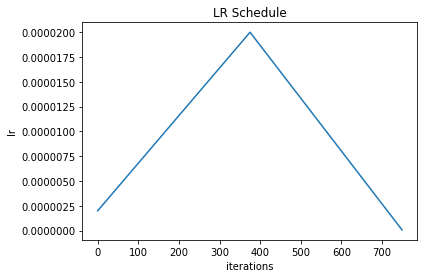

In [55]:
learner.plot('lr')

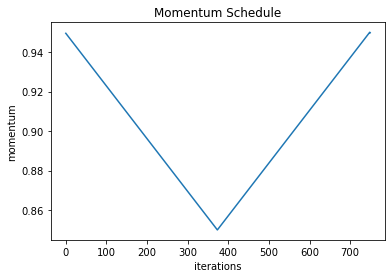

In [56]:
learner.plot('momentum')

In [ ]:
plt.plot(h.history['val_loss'], 'r')

In [61]:
model.save(outpath_model + "/" + modelname_ep_5)

print(outpath_model + "/" + modelname_ep_5)

../models/bert_1000_ep_5_20200102.h5


In [65]:
learner.validate(val_data=(x_test, y_test), 
               #  class_names=['label_all'],
                print_report=True)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        61
           1       0.77      0.87      0.82        39

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



array([[51, 10],
       [ 5, 34]])

In [66]:
cm =learner.validate(val_data=(x_test, y_test),print_report=False)

../pics/heatmap_1000_ep_5_20200102.jpg


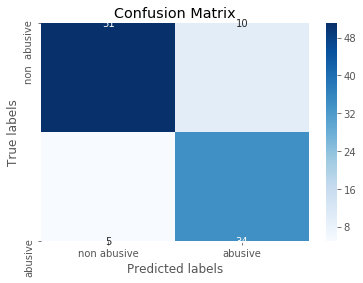

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues',fmt='g',annot_kws={"size": 10}) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['non abusive', 'abusive'])
ax.yaxis.set_ticklabels(['non  abusive','abusive'])

plt.savefig(outpath_pics + '/' + heatmapname)
print(outpath_pics + '/' + heatmapname)

In [70]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [92]:
predictor.save(outpath_predictor + "/" + predictorname)
print(outpath_predictor + "/" + predictorname)

../predictor/dectet_hatespeech_1000_ep_5_20200102


In [74]:
test_data = ['I am a man',
             'I am a woman', 
             'I am a lesbian', 
             'I am a gay', 
             'I am a gay man', 
             'I am dyke', 
             'I am a white man', 
             'I am a gay woman',
             'I am a white woman', 
             'I am a gay white man', 
             'I am a black man',
             'I am a gay black man', 
             'I am a black woman', 
             'I am a black gay woman',
             'Hello sunsine', 
             'you stuipid asshole motherfucker cocksucker',
             'I am musilm.  I like the islam']

In [75]:
predictor.predict_proba(test_data)

array([[0.98357993, 0.01642001],
       [0.9332882 , 0.06671185],
       [0.10986147, 0.89013857],
       [0.34927264, 0.65072733],
       [0.39335164, 0.6066483 ],
       [0.87805223, 0.12194774],
       [0.46172598, 0.53827405],
       [0.12983929, 0.87016076],
       [0.27746516, 0.72253484],
       [0.1352964 , 0.8647036 ],
       [0.7622597 , 0.23774028],
       [0.20218846, 0.79781157],
       [0.404536  , 0.595464  ],
       [0.0771357 , 0.9228643 ],
       [0.99259454, 0.00740544],
       [0.0013766 , 0.9986234 ]], dtype=float32)